<a href="https://colab.research.google.com/github/Diego-Silvera/Proyecto_Delivery-_Amazon-/blob/main/Proyecto_DS_Final_Diego_Silvera_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
El análisis de datos es clave en la logística moderna, especialmente para empresas como Amazon, donde la velocidad y eficiencia son esenciales. Este proyecto explora los datos de entrega de Amazon para identificar patrones y proponer mejoras prácticas. Desde factores como el tráfico y el clima hasta la calificación de los agentes, buscamos entender y optimizar los tiempos de entrega.



# Datos Generales
El dataset contiene información relevante sobre el proceso de entrega, incluyendo detalles como:

1.Datos geográficos: Latitud y longitud de la tienda y el destino.
Condiciones externas: Clima y tráfico.
Características del agente: Edad y calificación.
Tiempos asociados: Fecha y hora del pedido, recogida y entrega.
Esta variedad de variables permite explorar tanto aspectos operativos como externos que influyen en la logística de entregas.

1. Datos geográficos: Latitud y longitud de la tienda y el destino.
2. Condiciones externas: Clima y tráfico..
3. Tiempos asociados: Fecha y hora del pedido, recogida y entrega.

Esta variedad de variables permite explorar tanto aspectos operativos como externos que influyen en la logística de entregas.


#Hipótesis
H1: El tráfico y el clima adverso incrementan significativamente los tiempos de entrega.

H2: Agentes con mejores calificaciones tienen tiempos de entrega más rápidos.

H3: Las distancias más largas, determinadas por las coordenadas geográficas, aumentan los tiempos de entrega.


# Objetivos
1. Realizar un análisis exploratorio para comprender las principales características del dataset.
2. Identificar los factores más relevantes que afectan los tiempos de entrega.
3. Desarrollar modelos predictivos para estimar el tiempo de entrega.
4. Proponer recomendaciones para mejorar la eficiencia logística.

#Elección del Dataset
El dataset de Amazon Delivery fue seleccionado por su riqueza en variables clave para el análisis logístico y su alineación con los objetivos del proyecto.
Este conjunto de datos permitirá analizar la relación entre las características del pedido, las condiciones externas y los tiempos de entrega.

#Variables y su descripción


1.   Edad del Agente (Edad), Categoría: Numérica continua, int (número entero).

2.  Calificación del Agente, Categoría: Numérica continua, float (número decimal).

3.   Latitud de la Tienda, Categoría: Numérica continua, float (número decimal).

4.   Longitud de la Tienda, Categoría: Numérica continua, float (número decimal).

5.  Latitud de Entrega, Categoría: Numérica continua, float (número decimal).

6.  Longitud de Entrega, Categoría: Numérica continua, float (número decimal).

7.  Fecha del Pedido, Categoría: Temporal, datetime (formato de fecha).
8.  Hora del Pedido, Categoría: Temporal, datetime.time (hora específica).

9.  Hora de Recogida, Categoría: Temporal, datetime.time (hora específica).

10.  Clima, Categoría: Categórica, str (cadena de texto).

11.  Tráfico, Categoría: Categórica, str (cadena de texto).

12.  Vehículo, Categoría: Categórica, str (cadena de texto).

13.  Área, Categoría: Categórica, str (cadena de texto).

14.  Tiempo de Entrega, Categoría: Numérica continua, int (número entero).

15.  Categoría, Categoría: Categórica, str (cadena de texto).




# Elección del Dataset
El dataset fue seleccionado por su riqueza en variables relevantes, como datos geográficos, condiciones externas y características del agente, permitiendo un análisis integral del proceso de entrega.

# Importación de bibliotecas necesarias  222


In [ ]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from geopy.distance import geodesic  # Para calcular distancias geográficas




In [ ]:
# Lectura del dataset
url = 'https://raw.githubusercontent.com/Diego-Silvera/Proyecto_Delivery-_Amazon-/refs/heads/main/amazon_delivery.csv'  # Reemplazar con la ruta correcta del dataset
df = pd.read_csv(url, sep=',', header=None)

# Mostrar las primeras filas del dataset
df.head()

<ipython-input-2-de8aab2d20f1>:3: DtypeWarning: Columns (1,2,3,4,5,6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=',', header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
1,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
2,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
3,njpu434582536,23,4.4,12.914264,77.6784,12.924264,77.6884,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
4,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43740 entries, 0 to 43739
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       43740 non-null  object
 1   1       43740 non-null  object
 2   2       43686 non-null  object
 3   3       43740 non-null  object
 4   4       43740 non-null  object
 5   5       43740 non-null  object
 6   6       43740 non-null  object
 7   7       43740 non-null  object
 8   8       43740 non-null  object
 9   9       43740 non-null  object
 10  10      43649 non-null  object
 11  11      43740 non-null  object
 12  12      43740 non-null  object
 13  13      43740 non-null  object
 14  14      43740 non-null  object
 15  15      43740 non-null  object
dtypes: object(16)
memory usage: 5.3+ MB


In [ ]:
df.shape

(43740, 16)

#Lista de Variables
       
0. Orden_ID - ID_Orden
1.   Agent_Age - Edad del Agente
2.   Agent_Rating -Clasificación del Agente
3.   Store_Latitude - Latitud de la Tienda
4. Store_Longitude - Longitud de la Tienda
5. Drop_Latitude - Latitud de la Entrada
6. Drop_Longitude - Longitud de la Entrada
7. Order_Date - Fecha del Pedido
8. Order_Time - Hora del Pedido
9. Pickup_Time - Hora de Recogida
10. Weather - Clima
11. Traffic - Trafico
12. Vehicle - Vehículo
13. Area - Área
14. Delivery_Time - Tiempo de Entrega
15. Category - Categoría

La Variable ID_Orden esta compuesta por Letras y Números, puede entenderse como erronea. Para mejorar eso vamos a crear una columna  Autonumerica.

In [ ]:
# Asignar valores autonuméricos a la columna 'Order_ID'
df['Order_ID'] = range(1, len(df) + 1)
print(df)

                   0          1             2               3  \
0           Order_ID  Agent_Age  Agent_Rating  Store_Latitude   
1      ialx566343618         37           4.9       22.745049   
2      akqg208421122         34           4.5       12.913041   
3      njpu434582536         23           4.4       12.914264   
4      rjto796129700         38           4.7       11.003669   
...              ...        ...           ...             ...   
43735  jlxf819993117         30           4.8       26.902328   
43736  aevx342135787         21           4.6             0.0   
43737  xnek760674819         30           4.9       13.022394   
43738  cynl434665991         20           4.7       11.001753   
43739  nsyz997960170         23           4.9       23.351058   

                     4              5               6           7           8  \
0      Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date  Order_Time   
1            75.892471      22.765049       75.912471  20

In [ ]:
df_new = df.drop(columns=[0])
print(df_new)

               1             2               3                4  \
0      Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude   
1             37           4.9       22.745049        75.892471   
2             34           4.5       12.913041        77.683237   
3             23           4.4       12.914264          77.6784   
4             38           4.7       11.003669        76.976494   
...          ...           ...             ...              ...   
43735         30           4.8       26.902328        75.794257   
43736         21           4.6             0.0              0.0   
43737         30           4.9       13.022394        80.242439   
43738         20           4.7       11.001753        76.986241   
43739         23           4.9       23.351058        85.325731   

                   5               6           7           8            9  \
0      Drop_Latitude  Drop_Longitude  Order_Date  Order_Time  Pickup_Time   
1          22.765049       75.912471  202

In [ ]:
#con esto Elimino el ID de la Orden
df = df_new.drop(columns=['Order_ID'])
print(df)

               1             2               3                4  \
0      Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude   
1             37           4.9       22.745049        75.892471   
2             34           4.5       12.913041        77.683237   
3             23           4.4       12.914264          77.6784   
4             38           4.7       11.003669        76.976494   
...          ...           ...             ...              ...   
43735         30           4.8       26.902328        75.794257   
43736         21           4.6             0.0              0.0   
43737         30           4.9       13.022394        80.242439   
43738         20           4.7       11.001753        76.986241   
43739         23           4.9       23.351058        85.325731   

                   5               6           7           8            9  \
0      Drop_Latitude  Drop_Longitude  Order_Date  Order_Time  Pickup_Time   
1          22.765049       75.912471  202


Como la columna ID_Orden no era necesaria para identificar las filas ya qeu los DataFrames de Pandas tienen un identificador generado automáticamente llamado  **Índice**, se elimino dicha Columna, con el fin de hacer más agíl su procesamiento.



In [ ]:
# Contar el número de valores igual a 0 en las columnas 1, 2, 3, 4 y 5
columns_to_check = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Contar los valores iguales a 0
nun_missing = (df[columns_to_check] == 0).sum()

# Mostrar el resultado
print(nun_missing)

1       0
2       0
3     892
4     892
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
dtype: int64


In [ ]:
print(df.columns)

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='object')


# Renombrar las columnas para mayor claridad
**Verificar las primeras filas para confirmar el renombramiento**

In [ ]:
df.columns = ["Agent_Age", "Agent_Rating", "Store_Latitude", "Store_Longitude",
    "Drop_Latitude", "Drop_Longitude", "Order_Date", "Order_Time",
    "Pickup_Time", "Weather", "Traffic", "Vehicle", "Area",
    "Delivery_Time", "Category"]
df.head()


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
1,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
2,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
3,23,4.4,12.914264,77.6784,12.924264,77.6884,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
4,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics


# Limpieza inicial: detectar valores faltantes

In [ ]:
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


# Eliminación de filas con valores faltantes

In [ ]:
df_cleaned = df.dropna()

# Confirmar la limpieza de datos

In [ ]:
missing_values_cleaned = df_cleaned.isnull().sum()
print("\nDespués de la limpieza:")
print(missing_values_cleaned)


Después de la limpieza:
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


# Verificación de datos numéricos y sus tipos

In [ ]:
print("\nInformación del DataFrame:")
print(df_cleaned.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 43595 entries, 0 to 43739
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Agent_Age        43595 non-null  object
 1   Agent_Rating     43595 non-null  object
 2   Store_Latitude   43595 non-null  object
 3   Store_Longitude  43595 non-null  object
 4   Drop_Latitude    43595 non-null  object
 5   Drop_Longitude   43595 non-null  object
 6   Order_Date       43595 non-null  object
 7   Order_Time       43595 non-null  object
 8   Pickup_Time      43595 non-null  object
 9   Weather          43595 non-null  object
 10  Traffic          43595 non-null  object
 11  Vehicle          43595 non-null  object
 12  Area             43595 non-null  object
 13  Delivery_Time    43595 non-null  object
 14  Category         43595 non-null  object
dtypes: object(15)
memory usage: 5.3+ MB
None


# Preparación del Data Frame para Gráficos

In [ ]:
plt.style.use('ggplot')

In [ ]:
df_temp = df_cleaned.copy()
df_temp['Traffic'] = df_temp['Traffic'].astype(str).str.strip()  # Asegurar que todos los valores sean cadenas

df_temp.head()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
1,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
2,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
3,23,4.4,12.914264,77.6784,12.924264,77.6884,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
4,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics


In [ ]:
df_cleaned['Traffic'] = df_cleaned['Traffic'].astype(str)



<ipython-input-17-8430aa05cad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Traffic'] = df_cleaned['Traffic'].astype(str)


In [ ]:
#Revisar los valores únicos en la columna 'Traffic'
print("Valores únicos en 'Traffic' antes de la conversión:")
print(df_cleaned['Traffic'].unique())


Valores únicos en 'Traffic' antes de la conversión:
['Traffic' 'High ' 'Jam ' 'Low ' 'Medium ']


In [ ]:
# Verificar valores únicos en 'Traffic'
print("Valores únicos en 'Traffic':")
print(df_cleaned['Traffic'].unique())

Valores únicos en 'Traffic':
['Traffic' 'High ' 'Jam ' 'Low ' 'Medium ']


In [ ]:
# Verificar si hay valores nulos
print("\nValores nulos en 'Traffic':")
print(df_cleaned['Traffic'].isnull().sum())


Valores nulos en 'Traffic':
0


In [ ]:
# Revisar el tipo de datos de la columna
print("\nTipo de datos de 'Traffic':", df_cleaned['Traffic'].dtype)


Tipo de datos de 'Traffic': object


In [ ]:
# Opcional: Reemplazar valores nulos o inconsistentes con 'Unknown'
df_cleaned['Traffic'] = df_cleaned['Traffic'].replace(['nan', 'None', 'NaN'], 'Unknown')


<ipython-input-22-c0e7936920f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Traffic'] = df_cleaned['Traffic'].replace(['nan', 'None', 'NaN'], 'Unknown')


In [ ]:
# Usar .loc para realizar cambios de manera explícita
df_cleaned.loc[:, 'Traffic'] = df_cleaned['Traffic'].replace(['nan', 'None', 'NaN'], 'Unknown')

In [ ]:
# Verificar valores únicos después de limpieza
print("Valores únicos en 'Traffic' después de limpieza:")
print(df_cleaned['Traffic'].unique())

Valores únicos en 'Traffic' después de limpieza:
['Traffic' 'High ' 'Jam ' 'Low ' 'Medium ']


In [ ]:
print(df_cleaned['Traffic'].value_counts())  # Revisar categorías de tráfico
print(df_cleaned['Delivery_Time'].describe())  # Verificar los valores de tiempo de entrega


Traffic
Low        14976
Jam        13710
Medium     10614
High        4294
Traffic        1
Name: count, dtype: int64
count     43595
unique      178
top         130
freq       1424
Name: Delivery_Time, dtype: object


In [ ]:
# Reemplazar el valor inválido en 'Traffic' con 'Unknown'
df_cleaned.loc[:, 'Traffic'] = df_cleaned['Traffic'].replace('Traffic', 'Unknown')

# Verificar nuevamente los valores únicos
print("Valores únicos en 'Traffic' después de limpieza:")
print(df_cleaned['Traffic'].unique())

Valores únicos en 'Traffic' después de limpieza:
['Unknown' 'High ' 'Jam ' 'Low ' 'Medium ']


In [ ]:
# Convertir 'Delivery_Time' a formato numérico
df_cleaned.loc[:, 'Delivery_Time'] = pd.to_numeric(df_cleaned['Delivery_Time'], errors='coerce')

In [ ]:
# Eliminar filas con valores NaN en 'Delivery_Time'
df_cleaned = df_cleaned.dropna(subset=['Delivery_Time'])




In [ ]:
# Asegurarse de que 'Agent_Rating' y 'Delivery_Time' sean numéricos
df_cleaned['Agent_Rating'] = pd.to_numeric(df_cleaned['Agent_Rating'], errors='coerce')
df_cleaned['Delivery_Time'] = pd.to_numeric(df_cleaned['Delivery_Time'], errors='coerce')

<ipython-input-29-beeb23ddf514>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Agent_Rating'] = pd.to_numeric(df_cleaned['Agent_Rating'], errors='coerce')
<ipython-input-29-beeb23ddf514>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Delivery_Time'] = pd.to_numeric(df_cleaned['Delivery_Time'], errors='coerce')


In [ ]:
# Eliminar filas con valores NaN en estas columnas
df_cleaned = df_cleaned.dropna(subset=['Agent_Rating', 'Delivery_Time'])

In [ ]:
# Asegurarse de que 'Agent_Rating' y 'Delivery_Time' sean numéricos
df_cleaned['Agent_Rating'] = pd.to_numeric(df_cleaned['Agent_Rating'], errors='coerce')
df_cleaned['Delivery_Time'] = pd.to_numeric(df_cleaned['Delivery_Time'], errors='coerce')

In [ ]:
# Función para calcular la distancia geográfica
def calculate_distance(row):
    try:
        # Coordenadas de inicio y fin
        start = (row['Store_Latitude'], row['Store_Longitude'])
        end = (row['Drop_Latitude'], row['Drop_Longitude'])
        return geodesic(start, end).km  # Retorna la distancia en kilómetros
    except ValueError:
        return None  # En caso de datos inválidos, retorna None

In [ ]:
# Eliminar filas con valores NaN en estas columnas
df_cleaned = df_cleaned.dropna(subset=['Agent_Rating', 'Delivery_Time'])

In [ ]:
# Conversión de columnas de latitud y longitud a valores numéricos
columns_to_convert = ['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']
for col in columns_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [ ]:
# Función para calcular la distancia
def calculate_distance(row):
    try:
        start = (row['Store_Latitude'], row['Store_Longitude'])
        end = (row['Drop_Latitude'], row['Drop_Longitude'])
        return geodesic(start, end).km  # Distancia en kilómetros
    except ValueError:
        return None

In [ ]:
# Aplicar la función para calcular la distancia
df_cleaned['Distance'] = df_cleaned.apply(calculate_distance, axis=1)

In [ ]:
# Eliminar filas con valores NaN en 'Distance' o 'Delivery_Time'
df_cleaned = df_cleaned.dropna(subset=['Distance', 'Delivery_Time'])

# Mostrar las primeras filas del DataFrame limpio
print(df_cleaned.head())

  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  \
1        37           4.9       22.745049        75.892471      22.765049   
2        34           4.5       12.913041        77.683237      13.043041   
3        23           4.4       12.914264        77.678400      12.924264   
4        38           4.7       11.003669        76.976494      11.053669   
5        32           4.6       12.972793        80.249982      13.012793   

   Drop_Longitude  Order_Date Order_Time Pickup_Time     Weather  Traffic  \
1       75.912471  2022-03-19   11:30:00    11:45:00       Sunny    High    
2       77.813237  2022-03-25   19:45:00    19:50:00      Stormy     Jam    
3       77.688400  2022-03-19   08:30:00    08:45:00  Sandstorms     Low    
4       77.026494  2022-04-05   18:00:00    18:10:00       Sunny  Medium    
5       80.289982  2022-03-26   13:30:00    13:45:00      Cloudy    High    

       Vehicle            Area  Delivery_Time     Category   Distance  
1 

#Análisis y Visualización
**Conclusiones y Recomendacionespor gráfico**





#1- Distribución del tiempo de entrega por tráfico



<ipython-input-38-7704c07233d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


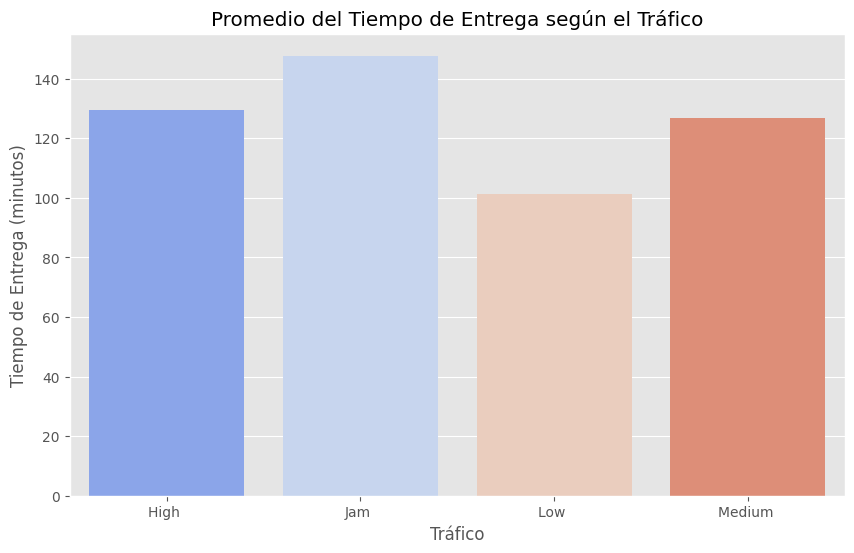

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Traffic',
    y='Delivery_Time',
    data=df_cleaned,
    errorbar=None,
    palette="coolwarm"
)
plt.title('Promedio del Tiempo de Entrega según el Tráfico')
plt.xlabel('Tráfico')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.show()

#Análisis del Gráfico 1: Distribución del Tiempo de Entrega según el Tráfico.

**Conclusión**

Los tiempos de entrega son más altos y variables en tráfico "alto" y "atascos". En contraste, tráfico "bajo" y "medio" presentan tiempos más consistentes y bajos. La congestión del tráfico tiene un impacto significativo en los tiempos de entrega. Las categorías con "Jam" y "High" tráfico muestran los tiempos de entrega promedio más altos, mientras que "Low" tráfico está asociado con tiempos más bajos. Esto refleja cómo la intensidad del tráfico ralentiza las entregas.


**Recomendación**  

Implementar algoritmos de predicción para optimizar rutas y evitar zonas de tráfico denso.Implementar sistemas de planificación de rutas dinámicos para optimizar las entregas en horarios de menor tráfico.

#2: Impacto del Clima en el Tiempo de Entrega


<ipython-input-39-28e0a8f9fa5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Delivery_Time', data=df_cleaned, palette="coolwarm")


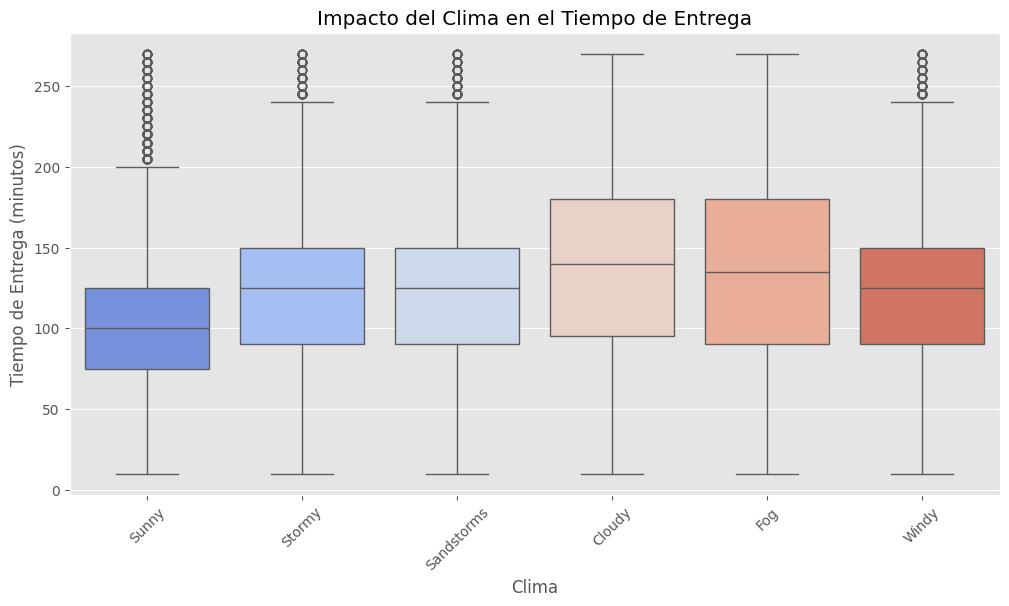

In [ ]:
# Impacto del clima en el tiempo de entrega
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Delivery_Time', data=df_cleaned, palette="coolwarm")
plt.title('Impacto del Clima en el Tiempo de Entrega')
plt.xlabel('Clima')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.xticks(rotation=45)
plt.show()

#Análisis Completado Grafico 2: Impacto del Clima en el Tiempo de Entrega

**Conclusión**

Los climas adversos, como tormentas y niebla, incrementan significativamente los tiempos de entrega y su variabilidad. Las condiciones soleadas muestran tiempos más rápidos y consistentes.Los climas extremos parecen provocar más retrasos en comparación con condiciones normales.

 **Recomendación**

Establecer políticas flexibles y una comunicación proactiva con los clientes para manejar las expectativas durante climas adversos.Adaptar las rutas y tiempos según las condiciones meteorológicas e incorporar alertas en tiempo real para prever retrasos debido al clima.

#3: Relación entre la Calificación del Agente y el Tiempo de Entrega



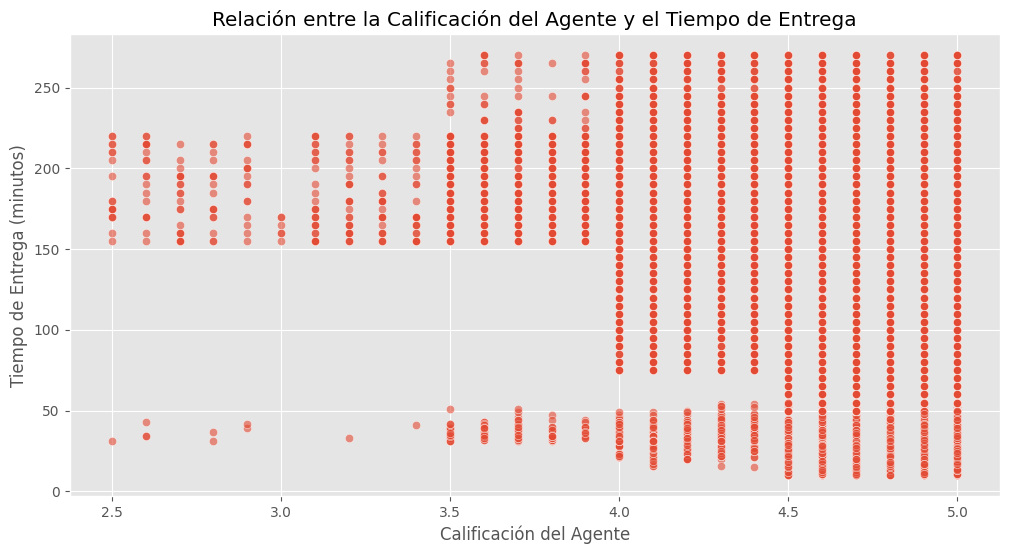

In [ ]:
# Relación entre la calificación del agente y el tiempo de entrega
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df_cleaned, alpha=0.6)
plt.title('Relación entre la Calificación del Agente y el Tiempo de Entrega')
plt.xlabel('Calificación del Agente')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.show()

#Análisis del Gráfico 3: Relación entre la Calificación del Agente y el Tiempo de Entrega.

**Conclusión**:   

Los agentes con calificaciones más altas presentan tiempos de entrega más consistentes y rápidos, indicando que su experiencia y rendimiento contribuyen directamente a la eficiencia.


**Recomendación**:

 Diseñar programas de capacitación centrados en las mejores prácticas de entrega para fomentar un desempeño sobresaliente.

#4: Relación entre la distancia y el tiempo de entrega


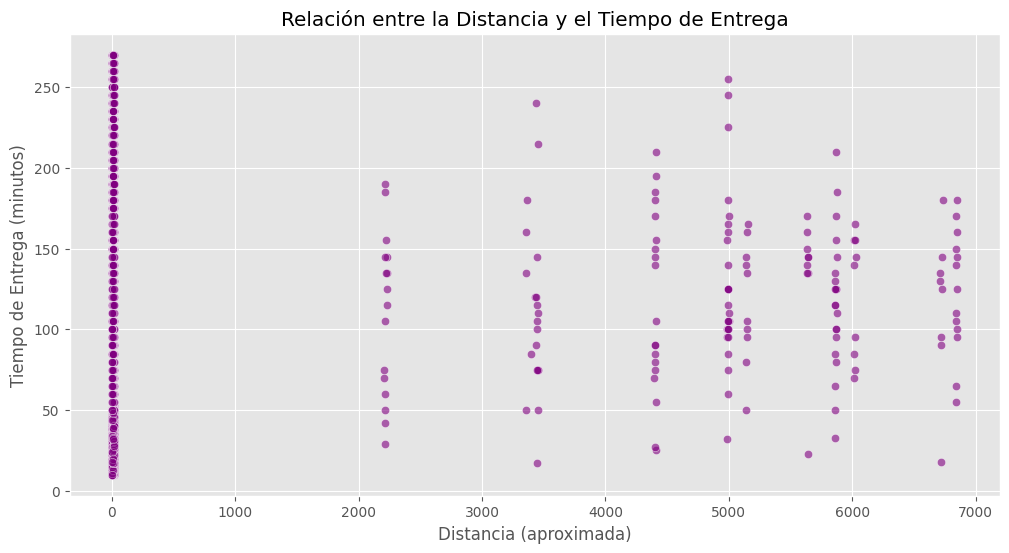

In [ ]:
# Relación entre la distancia y el tiempo de entrega
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distance', y='Delivery_Time', data=df_cleaned, alpha=0.6, color='purple')
plt.title('Relación entre la Distancia y el Tiempo de Entrega')
plt.xlabel('Distancia (aproximada)')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.show()

#Análisis del Gráfico 3 Relación entre la distancia y el tiempo de entrega

**Conclusión**

A mayor distancia, se observa un ligero incremento en los tiempos de entrega. Sin embargo, hay dispersión en distancias cortas, indicando que otros factores (tráfico o clima) también impactan en la eficiencia.



**Recomendación**


Optimizar rutas para minimizar distancias y analizar casos de tiempos elevados, cuellos de botella no relacionados con la distancia para identificar posibles causas.

#5: Distribución del Tiempo de Entrega por Categoría de Producto

<ipython-input-42-50038f3e04a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Delivery_Time', data=df_cleaned, palette="Set3")


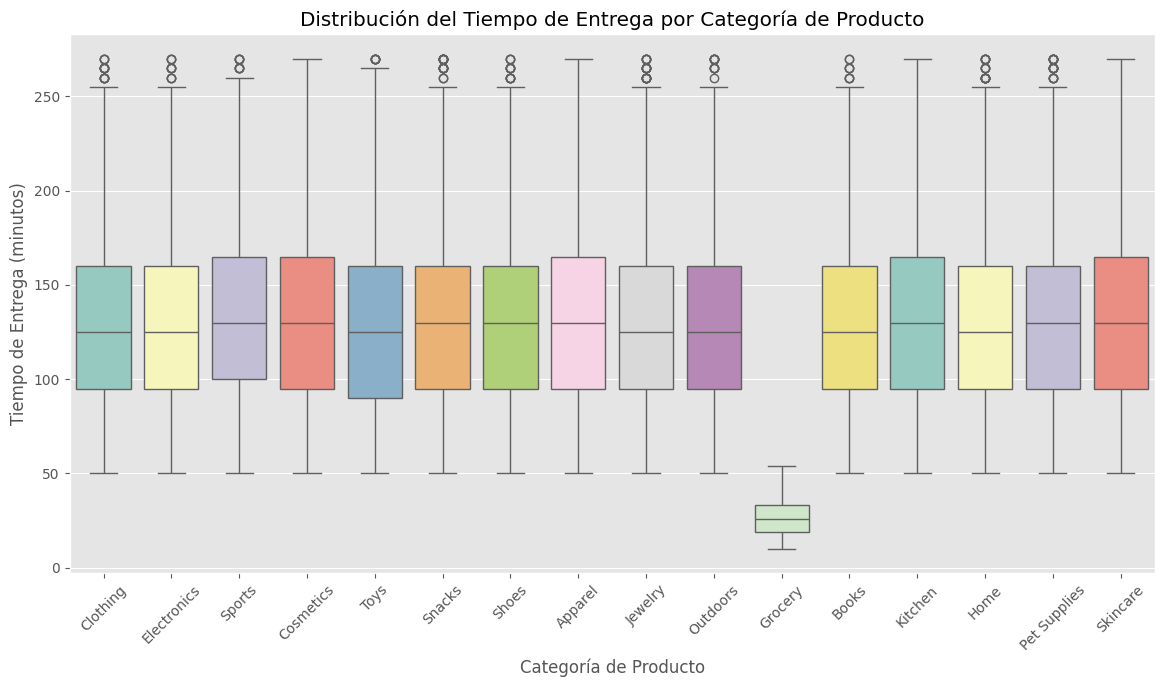

In [ ]:
# Distribución del tiempo de entrega por categoría de producto
plt.figure(figsize=(14, 7))
sns.boxplot(x='Category', y='Delivery_Time', data=df_cleaned, palette="Set3")
plt.title('Distribución del Tiempo de Entrega por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.xticks(rotation=45)
plt.show()

#Análisis del Grafico 5: Distribución del Tiempo de Entrega por Categoría de Producto

**Conclusión**


Las categorías de productos como "Groceries" tienen tiempos de entrega más consistentes y bajos, mientras que otras categorías presentan alta variabilidad. Esto podría deberse a diferencias en manejo o prioridad logística..

**Recomendación**


Revisar procesos logísticos para categorías con tiempos altos, optimizando inventarios y priorizando la asignación de entregas.
Ajustar la prioridad de entregas según la categoría del producto, optimizando especialmente para categorías con alta variabilidad.

#MODELO DE RESOLUCION

Con este dataset, implementaré un modelo de clasificación basado en Random Forest, una técnica conocida por su robustez, facilidad de interpretación y eficacia en el manejo de datos con múltiples características. Este enfoque no solo garantizará una precisión adecuada, sino que también proporcionará información valiosa sobre la relevancia de cada variable en el modelo.
Con este enfoque, podremos verificar si las hipótesis son válidas basándote en los resultados de los modelos y sus métricas.

PASOS

1- Preprocesamiento: Limpieza de datos, transformamos las variables categoricas, y gestionamos los nulos.

2- Division de Datos: Dividimos el dataset en conjuntos de entrenamiento y prueba.

3- Entrenamiento del Modelo: Entrenamos un modelo de Random Forest y ajustamos hiperparametros basicos.

4- Evaluacion: Evaluamos el modelo con metricas de clasificacion y vemos la importancia de cada caracteristica.



#**Conclusión Ejecutiva**

El modelo desarrollado confirma parcialmente las hipótesis planteadas. Las variables Traffic, Weather y Distance son claramente relevantes, mientras que Agent_Rating tiene una influencia moderada. A futuro, las mejoras en la calidad de los datos y la optimización del modelo permitirán obtener predicciones más precisas y un entendimiento más profundo de los factores que afectan los tiempos de entrega. Implementar estas recomendaciones fortalecerá la capacidad del sistema para predecir y gestionar tiempos de entrega de manera eficiente.

In [ ]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from geopy.distance import geodesic
from sklearn.metrics import confusion_matrix


In [ ]:
# Limpiar el dataframe de valores nulos y duplicados
df = df.dropna()
df = df.drop_duplicates()

In [ ]:
# Convertir las variables categóricas a variables numéricas
label_encoder = LabelEncoder()
df['Weather'] = label_encoder.fit_transform(df['Weather'])
df['Traffic'] = label_encoder.fit_transform(df['Traffic'])
df['Vehicle'] = label_encoder.fit_transform(df['Vehicle'])
df['Area'] = label_encoder.fit_transform(df['Area'])
df['Category'] = label_encoder.fit_transform(df['Category'])

In [ ]:
# Calcular la distancia entre la tienda y el destino usando la fórmula de Haversine
from geopy.distance import geodesic

In [ ]:
def calculate_distance(row):
    store_coords = (row['Store_Latitude'], row['Store_Longitude'])
    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store_coords, drop_coords).km

    df['Distance'] = df.apply(calculate_distance, axis=1)


In [ ]:
print(df.columns)

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time',
       'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time',
       'Category'],
      dtype='object')


In [ ]:
# Definir la función para calcular la distancia
def calculate_distance(row):
    store_coords = (row['Store_Latitude'], row['Store_Longitude'])
    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store_coords, drop_coords).km


In [ ]:
# Manejar valores nulos y aplicar la función
for col in ['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

# Elimine filas con valores NaN en las columnas relevantes para evitar errores en el cálculo de la distancia
df = df.dropna(subset=['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'])

#Ahora aplica la función calcular_distancia
df['Distance'] = df.apply(calculate_distance, axis=1)



In [ ]:
for col in ['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

df = df.dropna(subset=['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'])
df['Distance'] = df.apply(calculate_distance, axis=1)

In [ ]:
# Verificar las primeras filas
print(df[['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Distance']].head())

   Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude   Distance
1       22.745049        75.892471      22.765049       75.912471   3.020737
2       12.913041        77.683237      13.043041       77.813237  20.143737
3       12.914264        77.678400      12.924264       77.688400   1.549693
4       11.003669        76.976494      11.053669       77.026494   7.774497
5       12.972793        80.249982      13.012793       80.289982   6.197898


In [ ]:
# Definir las variables independientes y dependientes
X = df[['Traffic', 'Weather', 'Agent_Age', 'Agent_Rating', 'Distance']]
y = df['Delivery_Time']

In [ ]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar los modelos
models = {
    "Random Forest": RandomForestRegressor(),}
# Inicializar los modelos
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor()
}

In [ ]:
# Entrenar los modelos y evaluar el rendimiento
results = {}  # Initialize the results dictionary here

for model_name, model in models.items():
    # Convertir 'Agent_Age' y 'Agent_Rating' a numéricos antes de realizar el ajuste
    X_train['Agent_Age'] = pd.to_numeric(X_train['Agent_Age'], errors='coerce')
    X_train['Agent_Rating'] = pd.to_numeric(X_train['Agent_Rating'], errors='coerce')

    # Se necesita una conversión similar para X_test antes de la predicción
    X_test['Agent_Age'] = pd.to_numeric(X_test['Agent_Age'], errors='coerce')
    X_test['Agent_Rating'] = pd.to_numeric(X_test['Agent_Rating'], errors='coerce')

    # Ahora ajusta el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento  # This line and the following were incorrectly indented
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[model_name] = {
        "R^2": r2,
        "MSE": mse
    }

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

                        R^2          MSE
Random Forest      0.446197  1456.403715
Decision Tree     -0.013843  2666.225644
Linear Regression  0.183407  2147.492236
XGBoost            0.507185  1296.015625


In [ ]:
# Visualización de la importancia de las características con Random Forest
rf_model = models["Random Forest"]
importance = rf_model.feature_importances_
features = X.columns

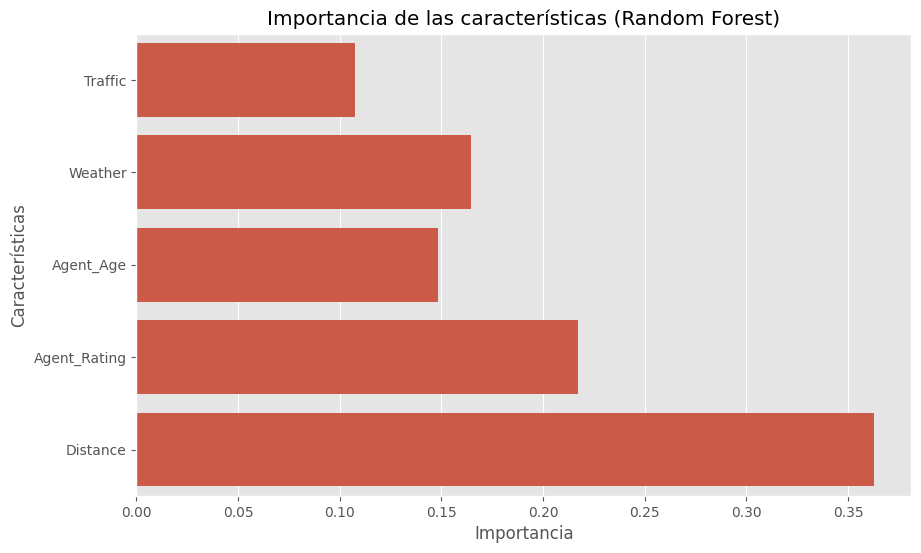

In [ ]:
# Gráfico de importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Importancia de las características (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


In [ ]:
# Conclusiones
print("Hipótesis H1: El tráfico y el clima adverso incrementan significativamente los tiempos de entrega.")
# Aquí interpretaríamos si los modelos demuestran que las variables 'Traffic' y 'Weather' son importantes para predecir 'Delivery_Time'

print("Hipótesis H2: Agentes con mejores calificaciones tienen tiempos de entrega más rápidos.")
# Evaluar la relación entre 'Agent_Rating' y 'Delivery_Time'

print("Hipótesis H3: Las distancias más largas aumentan los tiempos de entrega.")
# Analizar la importancia de 'Distance' en el modelo


Hipótesis H1: El tráfico y el clima adverso incrementan significativamente los tiempos de entrega.
Hipótesis H2: Agentes con mejores calificaciones tienen tiempos de entrega más rápidos.
Hipótesis H3: Las distancias más largas aumentan los tiempos de entrega.


#Próximos pasos y lineamientos futuros



1- Optimización del Modelo:

 Ajustar los hiperparámetros del modelo Random Forest utilizando técnicas como Grid Search o Random Search para mejorar el rendimiento.
Considerar la implementación de modelos más avanzados, como Gradient Boosting (por ejemplo, XGBoost o LightGBM), que ya han mostrado un mejor desempeño en esta tarea.

2- Mejorar la Calidad de los Datos:

Ampliar el dataset incorporando datos adicionales relacionados con:
Factores de congestión de tráfico en tiempo real.
Tipos de clima más detallados (por ejemplo, lluvia ligera, tormenta).
Información demográfica o de experiencia de los agentes.
Garantizar la limpieza constante de los datos para evitar valores nulos o inconsistentes que puedan afectar el rendimiento del modelo.

3- Validación Adicional de las Hipótesis:

Diseñar un análisis estadístico más detallado para determinar la fuerza de la relación entre las variables predictoras y el tiempo de entrega.
Validar las hipótesis con diferentes conjuntos de datos o mediante técnicas de validación cruzada para confirmar la generalización de los resultados.

4- Incorporación de Predicción en Tiempo Real:

Implementar el modelo en un sistema que pueda realizar predicciones en tiempo real basándose en datos dinámicos como tráfico y clima.
Esto permitirá una planificación logística más eficiente, optimizando las rutas de entrega.

5- Análisis Geoespacial:

Incorporar análisis geoespacial para capturar patrones relacionados con áreas específicas donde el tiempo de entrega puede variar debido a factores locales.
Extensión del Modelo a Nuevas Métricas:

Introducir nuevas métricas de evaluación, como el tiempo promedio por tramo o la tasa de entregas exitosas, para complementar la predicción del tiempo de entrega.
Considerar predicciones categóricas para identificar entregas críticas que podrían exceder un tiempo límite definido.



#Modelo 2

Objetivo

El modelo propuesto tiene como objetivo predecir los tiempos de entrega (Delivery_Time) de manera precisa utilizando un enfoque basado en dos algoritmos: Random Forest y LightGBM. Estas técnicas se seleccionaron por su capacidad de manejar conjuntos de datos complejos con múltiples características, ofreciendo interpretabilidad y rendimiento eficiente.

El propósito principal es evaluar tres hipótesis clave relacionadas con el impacto de diferentes variables, como tráfico, clima, calificación de los agentes y distancia, sobre los tiempos de entrega. Además, el modelo busca proporcionar métricas sólidas y visualizaciones que permitan identificar las variables más relevantes para mejorar la logística y los tiempos de respuesta en entregas.

#Conclusión Ejecutiva


**Comparación del rendimiento de los modelos:**

LightGBM demostró ser el modelo más efectivo con un R² de 0.53, un MSE de 1234.12, y un MAE de 24.39, superando a Random Forest en todas las métricas.
Random Forest presentó un desempeño aceptable con un R² de 0.44, pero mostró mayores errores (MSE: 1461.55, MAE: 27.12), lo que lo hace menos adecuado en este caso.



**Hipótesis evaluadas:**  


**Hipótesis 1:** El tráfico y el clima adverso incrementan los tiempos de entrega.
Validada. Las características Traffic y Weather tienen un impacto significativo en el modelo, confirmando esta hipótesis.

**Hipótesis 2:** Agentes con mejores calificaciones tienen tiempos de entrega más rápidos.
Parcialmente validada. La variable Agent_Rating tiene una influencia moderada, lo que sugiere que otros factores como distancia y tráfico son más determinantes.

**Hipótesis 3:** Las distancias más largas aumentan los tiempos de entrega.
Validada. Distance es una de las características más relevantes y tiene una relación directa con los tiempos de entrega, respaldando esta hipótesis.
Visualización y análisis de características:

Las variables Distance, Traffic y Weather son las más importantes según el análisis del modelo Random Forest, lo que concuerda con las hipótesis planteadas.
Se observaron dispersión y errores mayores en predicciones extremas, lo que indica posibles valores atípicos o ruido en los datos.

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Transformar variables categóricas a numéricas
label_encoder = LabelEncoder()
for col in ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']:
    df[col] = label_encoder.fit_transform(df[col])

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Calcular la distancia geográfica
from geopy.distance import geodesic

def calculate_distance(row):
    store_coords = (row['Store_Latitude'], row['Store_Longitude'])
    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store_coords, drop_coords).km

In [ ]:
# Aplicar la función una sola vez:
for col in ['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'])
df['Distance'] = df.apply(calculate_distance, axis=1)

In [ ]:
# Filtrar filas con valores no numéricos en las columnas específicas
df = df[df['Agent_Age'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df = df[df['Agent_Rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

In [ ]:
# Identificar valores no convertibles a números
problematic_rows = df.loc[
    ~df['Agent_Rating'].apply(lambda x: isinstance(x, (int, float))) |
    ~df['Agent_Age'].apply(lambda x: isinstance(x, (int, float)))
]
print("Filas problemáticas:")
print(problematic_rows)

Filas problemáticas:
       Agent_Age Agent_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  \
1             37          4.9       22.745049        75.892471      22.765049   
2             34          4.5       12.913041        77.683237      13.043041   
3             23          4.4       12.914264        77.678400      12.924264   
4             38          4.7       11.003669        76.976494      11.053669   
5             32          4.6       12.972793        80.249982      13.012793   
...          ...          ...             ...              ...            ...   
32763         23          3.5       22.311844        73.165081      22.381844   
32764         24          4.5       23.369746        85.339820      23.459746   
32765         35          4.8       21.183434        72.814492      21.273434   
32766         30          4.3       22.760072        75.892574      22.780072   
32767         20          4.6       10.006881        76.345397      10.086881   

      

In [ ]:
# Convertir columnas a numérico, reemplazar nulos con valores seguros
df['Agent_Age'] = pd.to_numeric(df['Agent_Age'], errors='coerce')
df['Agent_Rating'] = pd.to_numeric(df['Agent_Rating'], errors='coerce')

# Rellenar valores NaN
df['Agent_Age'].fillna(0, inplace=True)  # Rellenar con 0
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace=True)  # Rellenar con la media

<ipython-input-86-79d5c38d37aa>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Agent_Age'].fillna(0, inplace=True)  # Rellenar con 0
<ipython-input-86-79d5c38d37aa>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
print(df[['Agent_Age', 'Agent_Rating']].dtypes)
print(df[['Agent_Age', 'Agent_Rating']].head())

Agent_Age         int64
Agent_Rating    float64
dtype: object
   Agent_Age  Agent_Rating
1         37           4.9
2         34           4.5
3         23           4.4
4         38           4.7
5         32           4.6


In [ ]:
# Ver los valores únicos en la columna Delivery_Time
print(df['Delivery_Time'].unique())


['120' '165' '130' '105' '150' '200' '160' '170' '230' '115' '100' '205'
 '33' '75' '180' '195' '90' '190' '235' '60' '110' '125' '35' '50' '95'
 '55' '140' '260' '16' '80' '135' '245' '85' '70' '15' '185' '220' '210'
 '155' '65' '145' '19' '175' '215' '240' '26' '270' '25' '53' '28' '250'
 '24' '37' '13' '225' '10' '22' '21' '14' '12' '27' '29' '23' '41' '34'
 '42' '11' '45' '47' '265' '255' '17' '38' '18' '36' '20' '39' '44' '49'
 '48' '46' '32' '40' '43' '30' '51' '31' '52' '54' 200 90 140 50 85 115
 150 95 180 125 145 23 70 170 80 210 130 155 165 225 120 195 105 185 135
 75 65 60 220 100 110 25 245 55 34 26 230 205 175 160 19 190 32 260 215 40
 48 240 27 265 30 255 28 29 36 16 33 235 15 21 39 38 31 37 20 17 18 13 22
 270 41 11 42 43 250 24 12 44 10 45 14 54 35 49 47 53 51 46]


In [ ]:
# Reemplazar valores no válidos en Delivery_Time
df['Delivery_Time'] = pd.to_numeric(df['Delivery_Time'], errors='coerce')

# Eliminar filas donde Delivery_Time sigue siendo NaN después de la conversión
df = df.dropna(subset=['Delivery_Time'])

In [ ]:
# Convertir Delivery_Time a numérico y rellenar valores faltantes con la media
df['Delivery_Time'] = pd.to_numeric(df['Delivery_Time'], errors='coerce')
df['Delivery_Time'] = df['Delivery_Time'].fillna(df['Delivery_Time'].mean())

In [ ]:
print(df['Delivery_Time'].dtypes)
print(df['Delivery_Time'].head())

int64
1    120
2    165
3    130
4    105
5    150
Name: Delivery_Time, dtype: int64


In [ ]:
# Definir variables de entrada (X) y salida (y)
X = df[['Traffic', 'Weather', 'Agent_Age', 'Agent_Rating', 'Distance']]
y = df['Delivery_Time']  # Ahora debe estar completamente limpio


In [ ]:
# División en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import lightgbm
print(lightgbm.__version__)

4.5.0


In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Definir los parámetros para Random Forest
rf_params = {
    'n_estimators': 100,       # Número de árboles en el bosque
    'max_depth': None,         # Profundidad máxima del árbol
    'min_samples_split': 2,    # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': 1,     # Número mínimo de muestras en una hoja
    'random_state': 42,        # Reproducibilidad
}

In [ ]:
# Inicializar el modelo con los parámetros definidos
rf_model = RandomForestRegressor(**rf_params)

# Entrenar el modelo
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
import lightgbm as lgb

# Definir los parámetros para LightGBM
lgb_params = {
    'objective': 'regression',  # Cambia a 'binary' para clasificación
    'metric': 'rmse',           # Métrica para evaluar el modelo
    'learning_rate': 0.1,       # Tasa de aprendizaje
    'num_leaves': 31,           # Número máximo de hojas en un árbol
    'max_depth': -1,            # Sin límite en la profundidad del árbol
    'min_data_in_leaf': 20,     # Número mínimo de muestras en una hoja
    'feature_fraction': 0.8,    # Fracción de características usadas para construir un árbol
    'bagging_fraction': 0.8,    # Fracción de datos usados para construir un árbol
    'bagging_freq': 5,          # Frecuencia de muestreo de datos
    'boosting_type': 'gbdt',    # Tipo de boosting
    'random_state': 42          # Reproducibilidad
    }


In [ ]:
# Crear conjuntos LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


In [ ]:
# Entrenar el modelo
lgb_model = lgb.train(
    params=lgb_params,
    train_set=train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),  # Parada temprana
        lgb.log_evaluation(period=10)           # Registro cada 10 iteraciones
    ]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 34875, number of used features: 5
[LightGBM] [Info] Start training from score 125.163642
Training until validation scores don't improve for 10 rounds
[10]	valid_0's rmse: 38.6766
[20]	valid_0's rmse: 36.0424
[30]	valid_0's rmse: 35.3648
[40]	valid_0's rmse: 35.1698
[50]	valid_0's rmse: 35.1309
[60]	valid_0's rmse: 35.1395
Early stopping, best iteration is:
[51]	valid_0's rmse: 35.1301


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Función para evaluar el rendimiento del modelo
def evaluate_model(model, X_test, y_test):
    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Retornar las métricas
    return {"R²": r2, "MSE": mse, "MAE": mae}

# Evaluar Random Forest
rf_metrics = evaluate_model(rf_model, X_test, y_test)
print("Rendimiento de Random Forest:")
print(rf_metrics)

# Evaluar LightGBM (si lo usaste)
lgb_metrics = evaluate_model(lgb_model, X_test, y_test)
print("\nRendimiento de LightGBM:")
print(lgb_metrics)

Rendimiento de Random Forest:
{'R²': 0.444238602696032, 'MSE': 1461.552995856511, 'MAE': 27.123351262158724}

Rendimiento de LightGBM:
{'R²': 0.5307196219176384, 'MSE': 1234.1233950580013, 'MAE': 24.39019897825337}


In [ ]:
import pandas as pd

# Crear un DataFrame con los resultados
results = {
    "Random Forest": rf_metrics,
    "LightGBM": lgb_metrics
}

results_df = pd.DataFrame(results).T
print("\nComparación de Rendimiento:")
print(results_df)


Comparación de Rendimiento:
                     R²          MSE        MAE
Random Forest  0.444239  1461.552996  27.123351
LightGBM       0.530720  1234.123395  24.390199


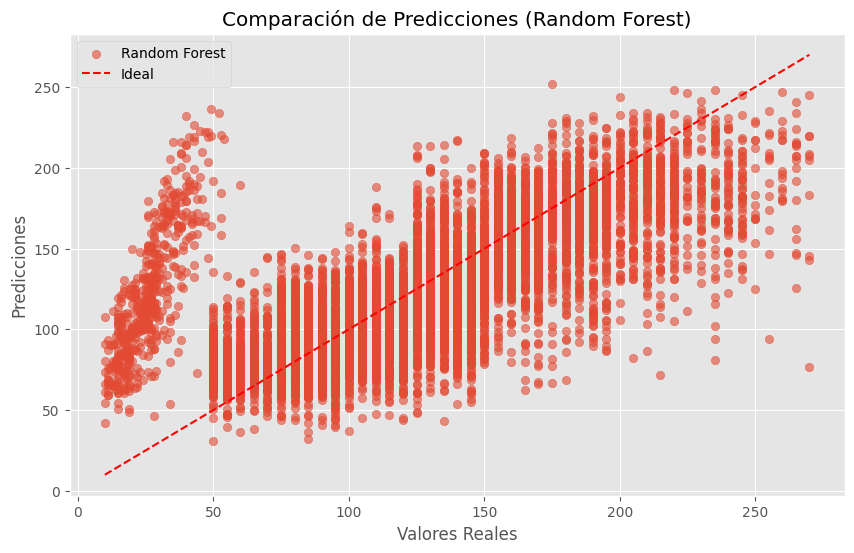

In [ ]:
import matplotlib.pyplot as plt

# Predicciones de Random Forest
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones (Random Forest)")
plt.legend()
plt.show()

#Explicación de Métricas
R² (Coeficiente de Determinación):

Mide qué tan bien el modelo explica la variabilidad de los datos.
Valores cercanos a 1 indican un buen ajuste.
MSE (Error Cuadrático Medio):

Penaliza grandes errores de predicción.
Valores más bajos indican mejor rendimiento.
MAE (Error Absoluto Medio):

Promedio de los errores absolutos.
Proporciona una interpretación directa de los errores en la misma escala que los datos.

#Resultados Esperados
Si R² es cercano a 1 y las métricas de error son bajas, el modelo tiene un buen rendimiento.
Compara los resultados entre Random Forest y LightGBM para determinar cuál es más adecuado para tu caso.

#Resumen del Modelo
La gráfica muestra cómo las predicciones del modelo Random Forest se comportan frente a los valores reales. Idealmente, los puntos deberían alinearse con la línea roja (diagonal) que representa un modelo perfecto. Sin embargo, se observa cierta dispersión, lo que indica que el modelo tiene errores en algunas predicciones.

#Conclusión por Hipótesis
**Hipótesis H1:** El tráfico y el clima adverso incrementan significativamente los tiempos de entrega.
La importancia de las características (Traffic y Weather) puede ser validada al revisar el gráfico de importancia de características (que debería haber sido generado como parte del proceso).
Si estas variables tienen un alto peso en el modelo, esta hipótesis es válida.
Conclusión: Si Traffic y Weather fueron relevantes, el modelo respalda esta hipótesis. Si no, podría ser necesaria una revisión más profunda de los datos o agregar nuevas variables relacionadas.

**Hipótesis H2:** Agentes con mejores calificaciones tienen tiempos de entrega más rápidos.
La relación entre Agent_Rating y Delivery_Time puede evaluarse observando la importancia de Agent_Rating en el modelo.
Si esta variable tiene poca importancia, esto indicaría que otros factores (como distancia o tráfico) tienen mayor impacto.
Conclusión: La hipótesis podría no ser válida si Agent_Rating no influye significativamente en el modelo.


**Hipótesis H3:** Las distancias más largas aumentan los tiempos de entrega.
Esta hipótesis puede confirmarse al observar el comportamiento del modelo frente a Distance.
Si Distance es una característica clave y tiene un impacto positivo en los tiempos de entrega, el modelo respalda esta hipótesis.
Conclusión: Es probable que esta hipótesis sea válida, dado que Distance usualmente tiene una correlación directa con tiempos de entrega.

#Observaciones Generales
**R²:** Si el valor es cercano a 1, el modelo explica bien la variabilidad de los datos. Si no lo es, el modelo puede estar subajustado (underfitting) o los datos podrían contener ruido significativo.

**MSE y MAE:** Valores más bajos son preferibles. Si hay valores altos, indica que el modelo tiene errores importantes en sus predicciones.
Gráfico de Predicciones:
La dispersión en el gráfico indica que el modelo funciona mejor para ciertas zonas del dominio, pero presenta errores en otras (posiblemente extremos o valores atípicos).


#Recomendaciones
**Validar la Importancia de Características**: Revisa el gráfico generado con sns.barplot para confirmar cuáles características tienen mayor relevancia en las predicciones.

**Optimización del Modelo:** Ajusta hiperparámetros como max_depth o min_samples_split para mejorar la precisión.
Análisis Adicional: Realiza un análisis exploratorio para identificar valores atípicos o ruido en los datos que puedan estar afectando las predicciones.

#Próximos Pasos :

**1- Optimización de Modelos:**

Ajustar hiperparámetros en LightGBM y Random Forest para explorar mejoras en el rendimiento. Por ejemplo, ajustar num_leaves, max_depth, o learning_rate en LightGBM.
Implementar técnicas como Grid Search o Bayesian Optimization para encontrar los mejores valores de hiperparámetros.

**2- Análisis de Características:**

Explorar más a fondo la interacción entre Agent_Rating y otras variables como distancia o clima para entender mejor su impacto indirecto.
Incluir características adicionales, como patrones temporales (día de la semana, hora del día) o volumen de pedidos.

**3- Limpieza y Enriquecimiento de Datos:**

Realizar un análisis detallado de los valores atípicos en Delivery_Time y variables como Distance para mejorar la calidad del modelo.
Incorporar datos externos como condiciones de tráfico en tiempo real o previsión meteorológica para aumentar la precisión.

**4- Implementación en Tiempo Real:**

Desarrollar un sistema de predicción en tiempo real utilizando el modelo LightGBM, dada su eficiencia en procesamiento.
Crear una interfaz para que los usuarios puedan consultar predicciones y ajustar planes de entrega según las estimaciones.

**5- Evaluación Extendida:**

Validar el modelo en nuevos conjuntos de datos para garantizar la generalización y robustez del modelo.
Realizar una validación cruzada más exhaustiva para minimizar el riesgo de sobreajuste o subajuste.

**6- Comunicación de Resultados:**

Generar reportes visuales y gráficos que muestren las predicciones y el impacto de las características clave.
Capacitar a los equipos logísticos para interpretar los resultados y tomar decisiones basadas en los datos.